In [16]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [17]:
df_train = pd.read_csv('data/train.csv') 
df_train.fillna(0, inplace=True)
df_train.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,0.0,1,2,23.4500,0,S
889,1,1,male,26.0,0,0,30.0000,C148,C


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

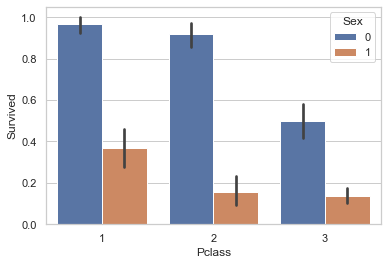

In [174]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

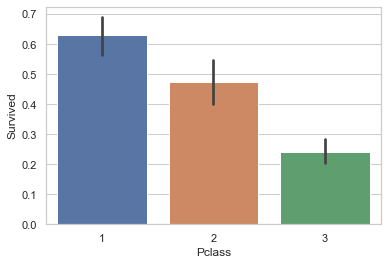

In [19]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_train, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

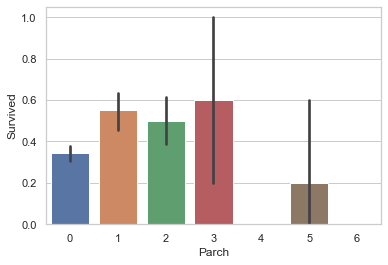

In [160]:
sns.barplot(data=df_train, x='Parch', y='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

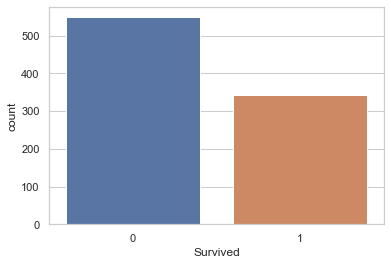

In [172]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Count'>

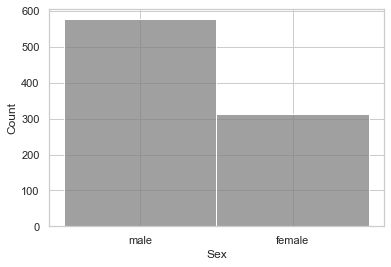

In [21]:
sns.histplot(data=df_train['Sex'], color='grey')

In [22]:
X = df_train['Sex']
X_enc = LabelEncoder().fit_transform(X)
df_train['Sex'] = X_enc
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,0.0,1,2,23.4500,0,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [23]:
df_test = pd.read_csv('data/test.csv')
df_test.fillna(0, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [24]:
df_corr = df_train.corr()
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.361353,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.024978,-0.114631,-0.245489,-0.182333
Age,0.010539,-0.361353,0.024978,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.035322,0.083081,-0.114631,-0.184664,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.048786,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.135516,0.159651,0.216225,1.000000


<AxesSubplot:>

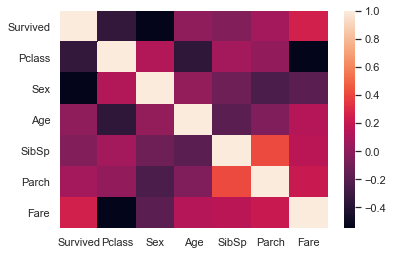

In [25]:
sns.heatmap(df_corr)

In [26]:
predictors = df_corr.columns

In [69]:
model = make_pipeline(OneHotEncoder(), KMeans(n_clusters=2))

In [70]:
clusters=model.fit(df_train[predictors]).predict(df_train[predictors])

In [71]:
df_clusters = df_train.copy()
df_clusters['Cluster'] = clusters
df_clusters

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cluster
0,0,3,1,22.0,1,0,7.2500,0,S,0
1,1,1,0,38.0,1,0,71.2833,C85,C,1
2,1,3,0,26.0,0,0,7.9250,0,S,1
3,1,1,0,35.0,1,0,53.1000,C123,S,1
4,0,3,1,35.0,0,0,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,S,0
887,1,1,0,19.0,0,0,30.0000,B42,S,1
888,0,3,0,0.0,1,2,23.4500,0,S,0
889,1,1,1,26.0,0,0,30.0000,C148,C,1


<AxesSubplot:xlabel='Cluster', ylabel='Survived'>

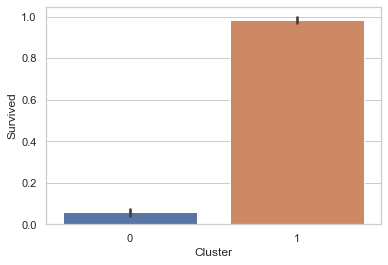

In [72]:
sns.barplot(data=df_clusters, x='Cluster', y='Survived')